In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPool2D,Dropout,Flatten,MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [3]:
Xtrain = pd.read_csv('fashion-mnist.csv')

In [4]:
Xtrain.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Xtrain = Xtrain.values

In [6]:
print(Xtrain.shape)

(10000, 785)


In [7]:
Ytrain = Xtrain[:,0]

In [8]:
Xtrain = Xtrain[:,1:]

In [9]:
print(Xtrain.shape)
print(Ytrain.shape)

(10000, 784)
(10000,)


In [10]:
Xtrain = Xtrain.reshape((10000,28,28))

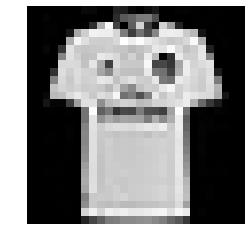

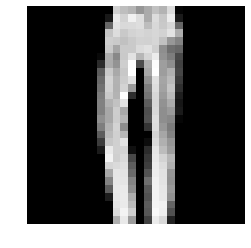

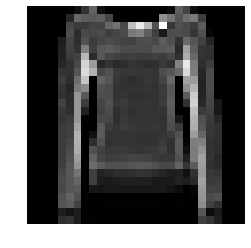

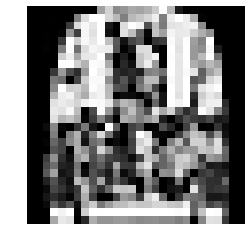

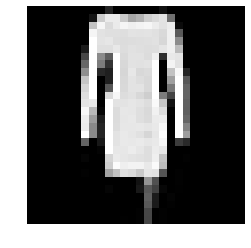

In [11]:
for i in range(5):
    plt.imshow(Xtrain[i],cmap="gray")
    plt.axis("off")
    plt.show()    

In [12]:
Xtrain = Xtrain.reshape((10000,28,28,1))

In [13]:
model = Sequential()

In [14]:
model.add(Convolution2D(32,(3,3),strides=(1,1),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          51232     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

In [16]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [17]:
print(Ytrain.shape)
Ytrain = to_categorical(Ytrain)
print(Ytrain.shape)

(10000,)
(10000, 10)


In [18]:
modelCheckPoint = ModelCheckpoint('model.h5',monitor="val_accuracy",verbose=1,save_best_only=True)
earlyStopping = EarlyStopping(monitor='val_accuracy',min_delta=0.05,patience=10,verbose=1,restore_best_weights=True)
callbacks = [modelCheckPoint,earlyStopping]

In [19]:
hist = model.fit(Xtrain,Ytrain,batch_size=512,epochs=25,validation_split=0.2,callbacks=callbacks)

Train on 8000 samples, validate on 2000 samples
Epoch 1/25
7680/8000 [===========================>..] - ETA: 0s - loss: 10.8495 - accuracy: 0.3053
Epoch 00001: val_accuracy improved from -inf to 0.55550, saving model to model.h5
8000/8000 [==============================] - 4s 442us/sample - loss: 10.4931 - accuracy: 0.3101 - val_loss: 1.2650 - val_accuracy: 0.5555
Epoch 2/25
7680/8000 [===========================>..] - ETA: 0s - loss: 1.1597 - accuracy: 0.6065
Epoch 00002: val_accuracy improved from 0.55550 to 0.70600, saving model to model.h5
8000/8000 [==============================] - 3s 383us/sample - loss: 1.1513 - accuracy: 0.6086 - val_loss: 0.8340 - val_accuracy: 0.7060
Epoch 3/25
7680/8000 [===========================>..] - ETA: 0s - loss: 0.8314 - accuracy: 0.6982
Epoch 00003: val_accuracy improved from 0.70600 to 0.75450, saving model to model.h5
8000/8000 [==============================] - 3s 383us/sample - loss: 0.8297 - accuracy: 0.6996 - val_loss: 0.6959 - val_accuracy: 

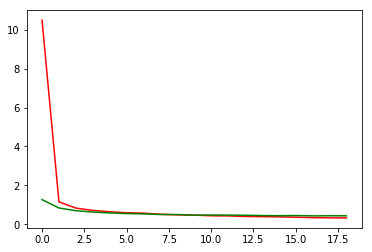

In [22]:
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'g')
plt.show()

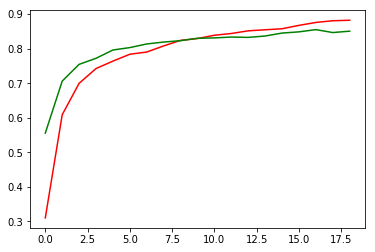

In [23]:
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'g')
plt.show()